In [1]:
# importing the basic libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [2]:
#!pip install wordcloud
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('vader_lexicon')

In [3]:
# reading the Modi Tweets csv
modi_tweet=pd.read_csv('C:\\Users\\HII\\Desktop\\Text Mining\\10 Text Mining\\narendramodi_tweets.csv')
modi_tweet.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [4]:
modi_tweet.shape

(3220, 14)



# Bag of word analysis

  We take text column as input and identify the individual words and their frequency of each unique word.
  From those individual words we will come to an idea what area the words are refering .
  
  

In [6]:
from wordcloud import WordCloud

## Word size /font size depends on the frequency of the word i.e higher freq is in bigger size

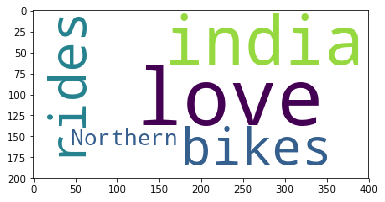

In [7]:

text='i love india i love bikes rides in Northern India'
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)

In [56]:
# join function for string

x=['a','b','c','d']
print(" ".join(x))
print("-".join(x))# we  can join using delimiters

a b c d
a-b-c-d


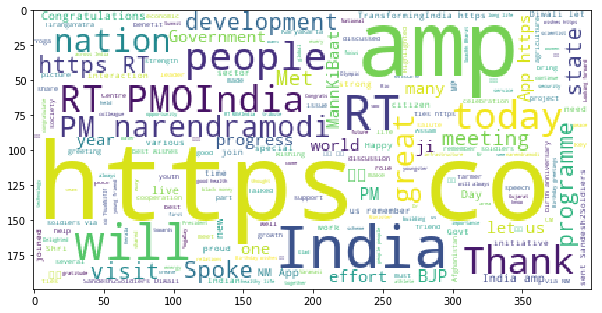

In [9]:
# joining all the values in column text in Modi tweet into a singke string
plt.figure(figsize=[10,8])
text=' '.join(modi_tweet['text'])
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)



WE see that Modi Speaks more about India,people,Government,will,Mannibat,development progreess,nation,today

In [10]:
# stopwords are  words like is, the an, a her, them ,what etc  and are not there in the text visualisation
stopwords=nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [11]:
cust_stopwords=['RT','https','amp']

In [12]:
# adding elements to List of stopwords
stopwords.extend(cust_stopwords)
len(stopwords)

182

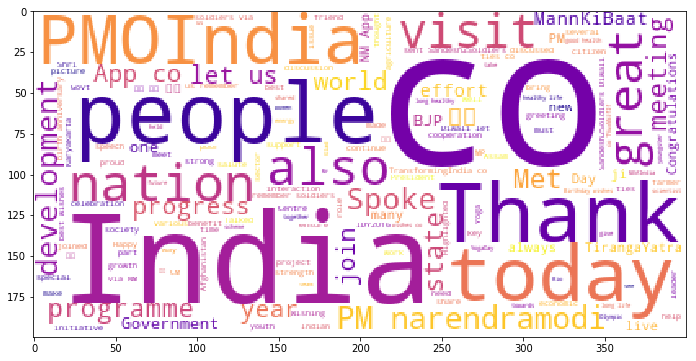

In [13]:
# Removing stopwords from the text 
plt.figure(figsize=[12,6])
wc=WordCloud(background_color='white',stopwords=stopwords,colormap='plasma').generate(text)
plt.imshow(wc)


# Text Cleaning

- converting every character to lower case to avoid the redudancy due to case sensitivity
- remove special character and junk values
- remove stopwords
- identify root if the word called as stemming/Lemmatization

In [19]:
# Converting into Lower case

docs=modi_tweet['text'].str.lower()


In [20]:

# remove special characters and junk values
text=pd.Series(['This sentence has numbers 123','this sentence has special character !@!#!%$'])
text.str.replace('[a-zA-Z]',"-")# replaces all the alphabets in lower and upper case with -
text.str.replace('[0-9]','')# if no replacement values are given it just removes the values
text.str.replace('[!@#$%^&*]','')
text.str.replace('[^a-zA-Z@# ]','')# to retain the all the character except alphabets  

0                This sentence has numbers 
1    this sentence has special character @#
dtype: object

In [21]:
# remove special characters and junk values

docs=docs.str.replace('[^a-z@# ]','')
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [28]:
# Spliting each word in a each doc /tweet
docs_clean=[]
for doc in docs.head(2):
    words=doc.split(" ")
    #words=nltk.word_tokenize(doc)-- it removes the # and @ also separately
    print(doc)
    print(words)
    print("----------")

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards #transformingindia
['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
----------
rashtrapati jis address to both houses of parliament was indepth amp extensive do hear httpstcordkqtjgnnx @rashtrapatibhvn
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
----------


In [31]:
x=[1,2,3,4,5]
y=[]
for i in x:
    y.append(i**2)
print(y)    

[1, 4, 9, 16, 25]


In [32]:
# list comprehension
y=[i*i for i in x]
y

[1, 4, 9, 16, 25]

In [33]:
z=[i*i for i in x if i>3] # it will return square of those numbers which satify the if condition 
z

[16, 25]

In [34]:
x=['of','we','india','the','soldiers']
[word for word in x if word not in stopwords]

['india', 'soldiers']

# Stemming- it returns the root word by removing the verb
# For text classification stemming is useful

# for sentiment analysis dont use stemming

In [39]:

stemmer=nltk.stem.PorterStemmer()
stemmer.stem('playing')
stemmer.stem('plays')
stemmer.stem('played')
stemmer.stem('organization')# bad example

'organ'

In [40]:
[stemmer.stem(word) for word in x if word not in stopwords]

['india', 'soldier']

In [53]:
docs_clean=[]
for doc in docs:
    words=doc.split(" ")
    #words=nltk.word_tokenize(doc)-- it removes the # and @ also separately
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    #print(doc)
    #print(words)
    #print(words_clean)
    #print('-----------')
    text_clean=" ".join(words_clean)# re-joining back the the words to docs
    docs_clean.append(text_clean)   

# General function to do text cleaning

In [83]:
# Converting into Lower case and Replacing all the Special Character other than @ and # 
docs=modi_tweet['text'].str.lower().str.replace('[^a-z@# ]','')
# Stop words file importing
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt'])# to add custom stopword list to our original list ofn stopwords
stemmer=nltk.stem.PorterStemmer()

# Function to clean the each doc with stopwords and lemmitiation
def clean_doc(doc):
    words=doc.split(" ")
    words_clean=[stemmer.stem(w) for w in words if w not in stopwords]
    return(' '.join(words_clean))# re-joining back the the words to docs
docs_clean=docs.apply(clean_doc)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

### Document term Matrix- We collate all documents/tweets together to form a matrix with columns as no of unique terms/words and rows as each tweet/docs
#### Corpus= collection of documents

1 word per term--> unigram   -(1,1)   
2 words per term --> bigram  -(2,2)   
3 words per term--> trigram  -(3,3)    

## always use fit() for training, tranform() for validation,test data avoid Data leak

In [122]:
# document-term matrix creation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=5,ngram_range=(1,1))# drops the least appearing terms
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)
dtm

# rows- number of documents-3220
# columns- no od unique words-7342

<3220x1226 sparse matrix of type '<class 'numpy.int64'>'
	with 23035 stored elements in Compressed Sparse Row format>

In [123]:
# Sparsity
r=3220
c=7342
sparsity=((r*c)-33409)/(r*c)*100
sparsity

99.85868338547385

In [124]:
# converting the DTM into a structured matrix format
df_dtm=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df_dtm.head()

,aadhaar,abeshinzo,abhiyan,absolut,access,accomplish,account,achiev,across,act,...,year,yesterday,yoga,yogaday,yogrishiramdev,yojana,young,youngster,youth,zay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


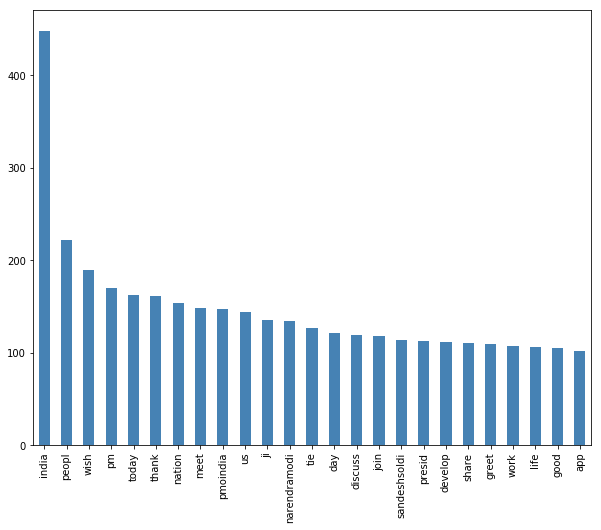

In [125]:
# column  sum to find the frequency of each term
plt.figure(figsize=[10,8])
df_dtm.sum().sort_values(ascending=False).head(25).plot.bar(color='steelblue')

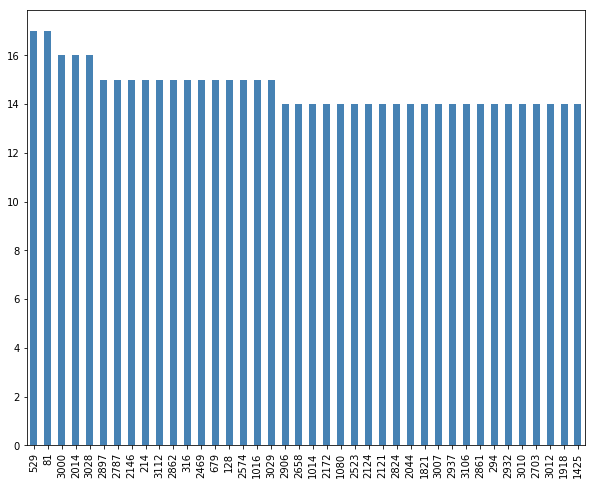

In [126]:
# Row sum gives number of words/terms in a document- document length
plt.figure(figsize=[10,8])
doc_len=df_dtm.sum(axis=1)
doc_size=pd.DataFrame({'Doc-Size':doc_len},index=range(1,3221))
doc_size   

doc_len.sort_values(ascending=False).head(40).plot.bar(color='steelblue')

In [ ]:
# Document Classification
senti=pd.read_csv('')